In [171]:
pip install chart-studio

In [172]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline

import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

In [173]:
df=pd.read_csv('Consumer_Complaints_train.csv')
df_test=pd.read_csv('Consumer_Complaints_test_share.csv')
df.shape

(478421, 18)

In [174]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666


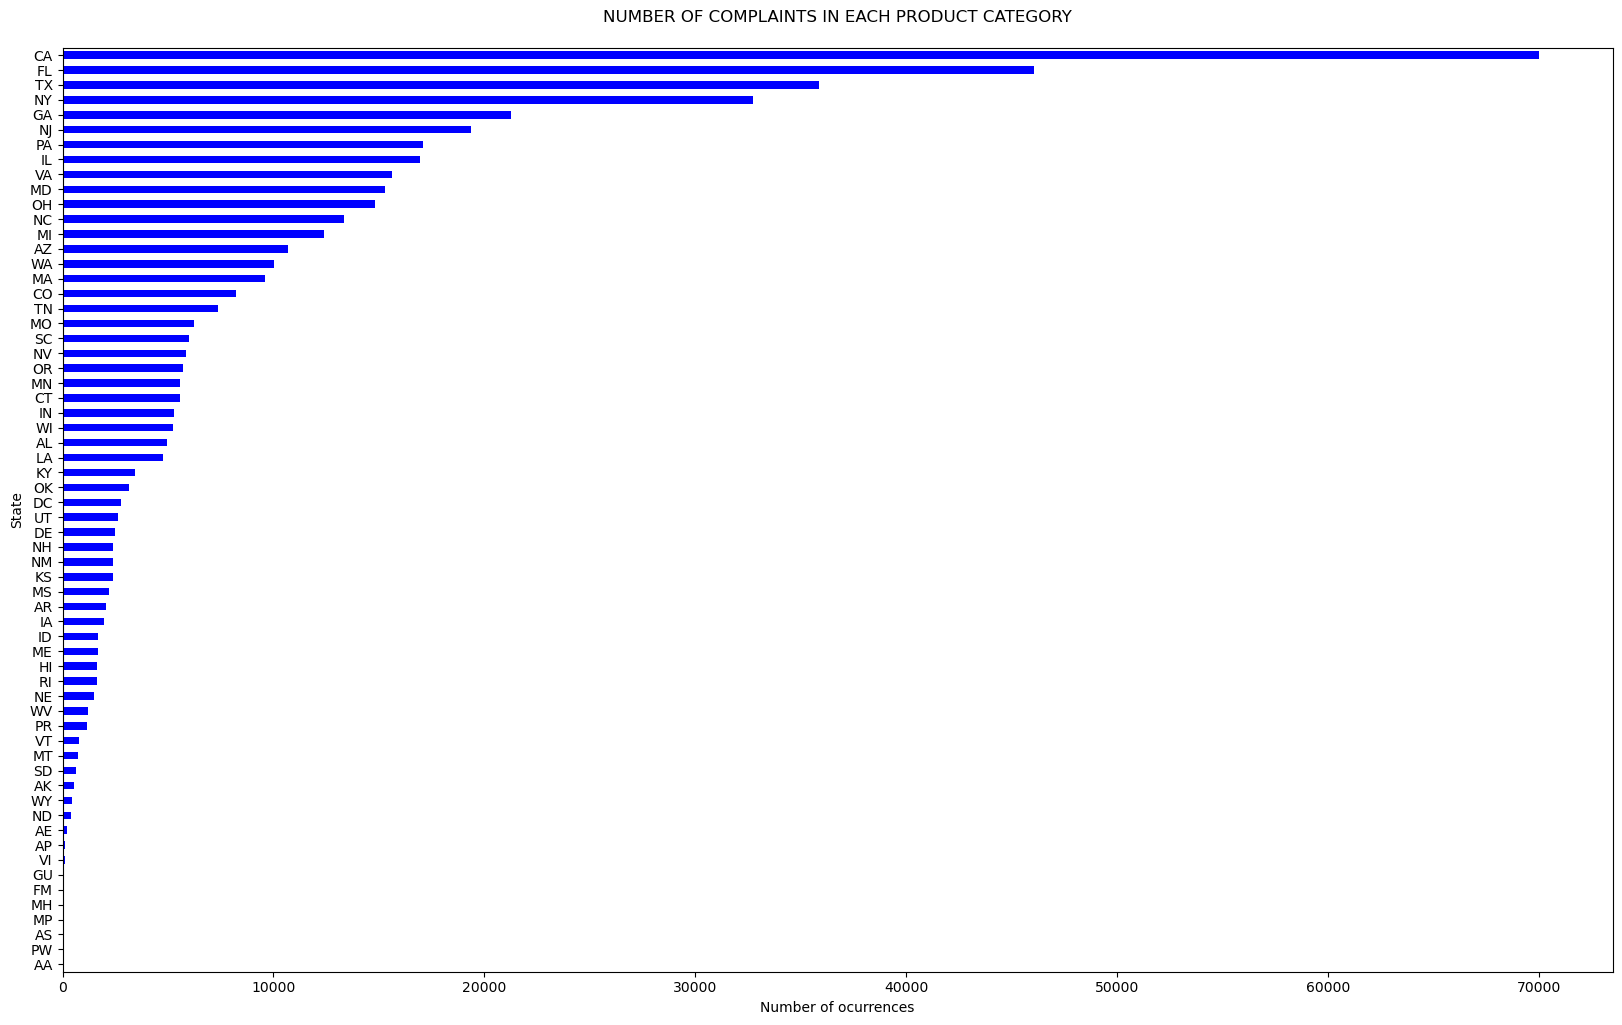

In [175]:
fig = plt.figure(figsize=(20,12))
df.groupby(['State'])['Complaint ID'].count().sort_values().plot.barh(
    ylim=0, color='blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [176]:
df[df['State'] == 'CA']['Product'].value_counts()

Product
Mortgage                   27469
Debt collection            11604
Credit reporting           10532
Credit card                 7823
Bank account or service     7502
Consumer Loan               2163
Student loan                1651
Money transfers              459
Payday loan                  420
Prepaid card                 316
Other financial service       62
Name: count, dtype: int64

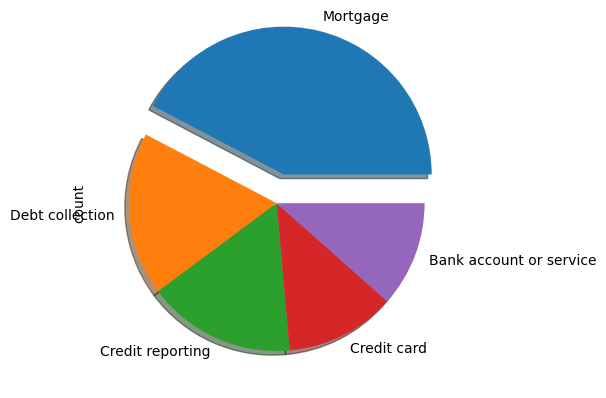

In [177]:
df[df['State'] == 'CA']['Product'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

In [178]:
df[df['State'] == 'CA']['Issue'].value_counts().head(10)

Issue
Loan modification,collection,foreclosure    15969
Loan servicing, payments, escrow account     7589
Incorrect information on credit report       7468
Cont'd attempts collect debt not owed        5253
Account opening, closing, or management      3534
Disclosure verification of debt              2062
Deposits and withdrawals                     1992
Application, originator, mortgage broker     1928
Communication tactics                        1842
Other                                        1320
Name: count, dtype: int64

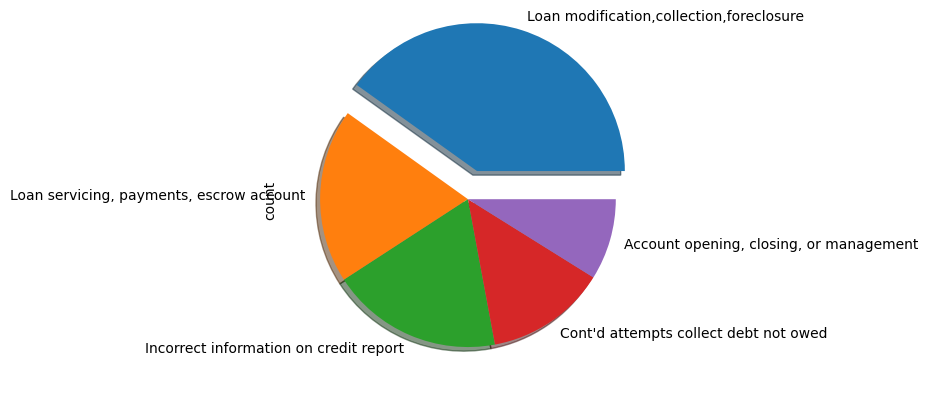

In [179]:
df[df['State'] == 'CA']['Issue'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

Product
Mortgage                   32.64
Debt collection            18.09
Credit reporting           16.95
Credit card                11.99
Bank account or service    11.37
Consumer Loan               3.89
Student loan                3.12
Money transfers             0.70
Payday loan                 0.67
Prepaid card                0.47
Other financial service     0.11
Virtual currency            0.00
Name: count, dtype: float64


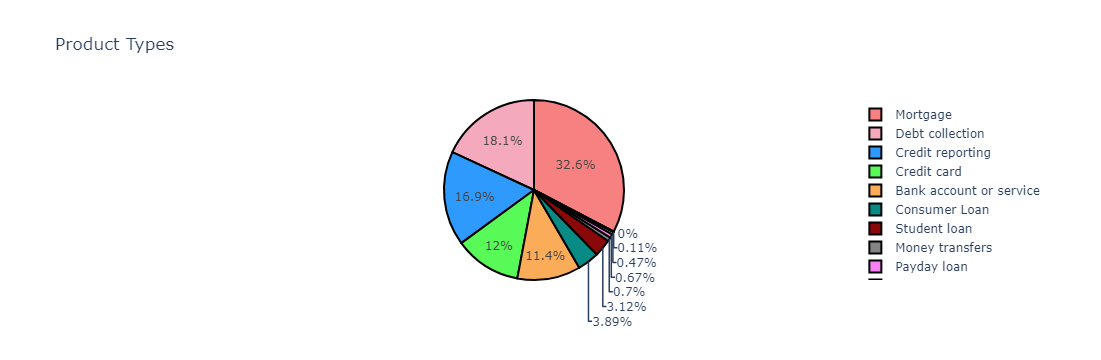

In [180]:
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

In [181]:
# Building the variables for our graphs
disputed = df['Consumer disputed?'].value_counts()
company_response = df['Company response to consumer'].value_counts()
top5_disputed = df['Company'].loc[df['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['Company'].loc[df['Consumer disputed?'] == 'No'].value_counts()[:5]

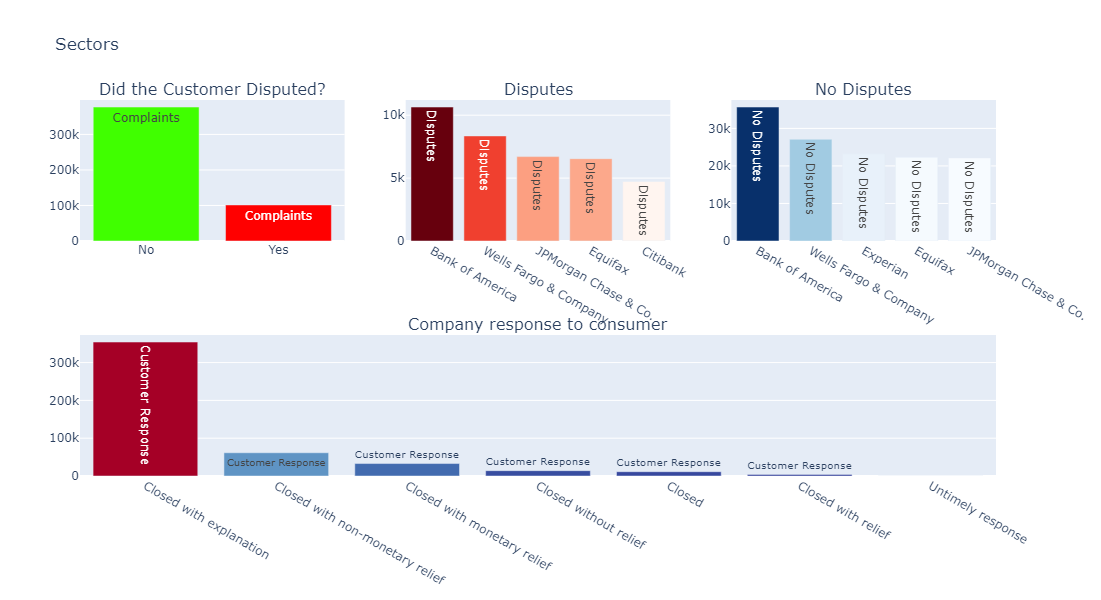

In [182]:

# Top three subplots
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )

top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Blues')
    )

# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=df['Company response to consumer'].value_counts().values,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], 
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], 
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], 
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)

fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer Disputed?',
                                          'Disputes',
                                         'No Disputes',
                                         'Company response to consumer'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=600, width=800, title='Sectors')
iplot(fig, filename='Complaints')

In [183]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['year_received'], df['month_received'] = df['Date received'].dt.year, df['Date received'].dt.month
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_received,month_received
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103,2014,5
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666,2014,9
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363,2014,3
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177,2015,7
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572,2014,11


In [184]:
# Create a Line Plot by the top 5 companies  by year who had more customer interaction cases (Disputes and No Disputes)
sorting_groups = df.groupby(['year_received', 'Consumer disputed?'])['Company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}


year_crm = pd.DataFrame(data=d).reset_index()
year_crm.sort_values(by='CRM', ascending=False)

crm_df = year_crm.rename(columns={"level_2": "Company"})

# Conditionals Top 5 Companies with dispues (Bank of America, Wells Fargo, JP Morgan, Equifax, CitiBank)
boa_disputes = crm_df.loc[(crm_df['Company'] == 'Bank of America') & (crm_df['Consumer disputed?'] == 'Yes')]
wfc_disputes = crm_df.loc[(crm_df['Company'] == 'Wells Fargo & Company') & (crm_df['Consumer disputed?'] == 'Yes')]
jp_disputes = crm_df.loc[(crm_df['Company'] == 'JPMorgan Chase & Co.') & (crm_df['Consumer disputed?'] == 'Yes')]
equi_disputes = crm_df.loc[(crm_df['Company'] == 'Equifax') & (crm_df['Consumer disputed?'] == 'Yes')]
citi_disputes = crm_df.loc[(crm_df['Company'] == 'Citibank') & (crm_df['Consumer disputed?'] == 'Yes')]

# Establish the year (Continue Here tomorrow!)
years = boa_disputes['year_received'].values.tolist()

In [185]:
crm_df.head()

,year_received,Consumer disputed?,Company,CRM
0,2011,No,Bank of America,314
1,2011,No,JPMorgan Chase & Co.,232
2,2011,No,Citibank,196
3,2011,No,Capital One,154
4,2011,No,Wells Fargo & Company,139


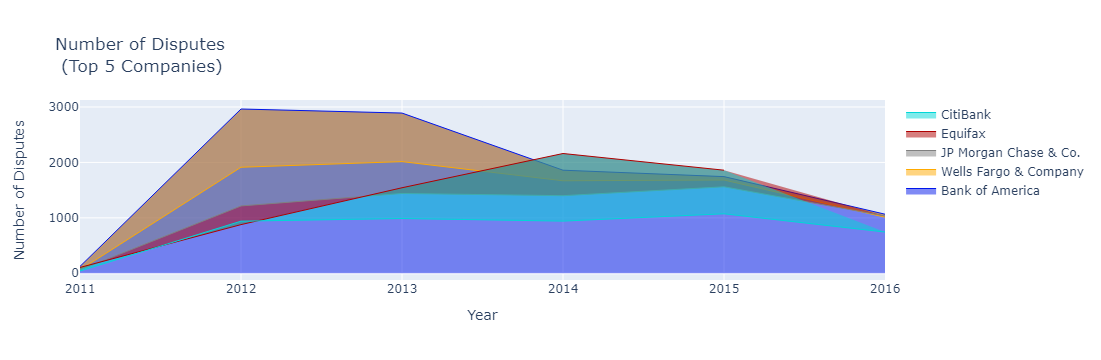

In [186]:
# Implementing line chart (top 5 companies with complaints)
boa_disputes_amount = boa_disputes['CRM'].values.tolist()
wfc_disputes_amount = wfc_disputes['CRM'].values.tolist()
jp_disputes_amount = jp_disputes['CRM'].values.tolist()
equi_disputes_amount = equi_disputes['CRM'].values.tolist()
citi_disputes_amount = citi_disputes['CRM'].values.tolist()

# Text to add
boa_text = [str(dis) + '\n Disputes'  for dis in boa_disputes_amount]
wfc_text = [str(wfc) + '\n Disputes'  for wfc in wfc_disputes_amount]
jp_text = [str(jp) + '\n Disputes' for jp in jp_disputes_amount]
equi_text = [str(equi) + '\n Disputes' for equi in equi_disputes_amount]
citi_text = [str(citi) + '\n Disputes' for citi in citi_disputes_amount]

boa_disputes_chart = go.Scatter(
    x=years,
    y=boa_disputes_amount,
    text=boa_text,
    name='Bank of America', 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 22, 235)',
             ),
    fill='tonexty'
)

wfc_disputes_chart = go.Scatter(
    x=years,
    y=wfc_disputes_amount,
    text=wfc_text,
    name="Wells Fargo & Company", 
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(275, 170, 0)',
             ),
    fill='tonexty'
)


jp_disputes_chart = go.Scatter(
    x=years,
    y=jp_disputes_amount,
    text=jp_text,
    name='JP Morgan Chase & Co.',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(128, 128, 128)',
             ),
    fill='tonexty'
)

equi_disputes_chart = go.Scatter(
    x=years,
    y=equi_disputes_amount,
    text=equi_text,
    name='Equifax',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(175, 0, 0)',
             ),
    fill='tonexty'
)

citi_disputes_chart = go.Scatter(
    x=years,
    y=citi_disputes_amount,
    text=citi_text,
    name='CitiBank',
    hoverinfo='x+text',
    mode='lines',
    line=dict(width=1,
             color='rgb(0, 215, 215)',
             ),
    fill='tonexty'
)

data = [boa_disputes_chart, wfc_disputes_chart, jp_disputes_chart, equi_disputes_chart, citi_disputes_chart]

layout = dict(title = 'Number of Disputes <br> (Top 5 Companies)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Disputes')
             )


fig = dict(data=data, layout=layout)


iplot(fig, filename='basic-area-no-bound')

In [187]:
# Months with the highest disputes (We will make a barplot)
def customerservice_per_month(month, dispute):
    result = df.loc[(df['month_received'] == month) & (df['Consumer disputed?'] == dispute)]
    return result

# Monthly Disputes
dis_january = len(customerservice_per_month(month=1, dispute='Yes'))
dis_february = len(customerservice_per_month(month=2, dispute='Yes'))
dis_march = len(customerservice_per_month(month=3, dispute='Yes'))
dis_april = len(customerservice_per_month(month=4, dispute='Yes'))
dis_may = len(customerservice_per_month(month=5, dispute='Yes'))
dis_june = len(customerservice_per_month(month=6, dispute='Yes'))
dis_july = len(customerservice_per_month(month=7, dispute='Yes'))
dis_august = len(customerservice_per_month(month=8, dispute='Yes'))
dis_september = len(customerservice_per_month(month=9, dispute='Yes'))
dis_october = len(customerservice_per_month(month=10, dispute='Yes'))
dis_november = len(customerservice_per_month(month=11, dispute='Yes'))
dis_december = len(customerservice_per_month(month=12, dispute='Yes'))

# Monthly No-Disputes
nodis_january = len(customerservice_per_month(month=1, dispute='No'))
nodis_february = len(customerservice_per_month(month=2, dispute='No'))
nodis_march = len(customerservice_per_month(month=3, dispute='No'))
nodis_april = len(customerservice_per_month(month=4, dispute='No'))
nodis_may = len(customerservice_per_month(month=5, dispute='No'))
nodis_june = len(customerservice_per_month(month=6, dispute='No'))
nodis_july = len(customerservice_per_month(month=7, dispute='No'))
nodis_august = len(customerservice_per_month(month=8, dispute='No'))
nodis_september = len(customerservice_per_month(month=9, dispute='No'))
nodis_october = len(customerservice_per_month(month=10, dispute='No'))
nodis_november = len(customerservice_per_month(month=11, dispute='No'))
nodis_december = len(customerservice_per_month(month=12, dispute='No'))

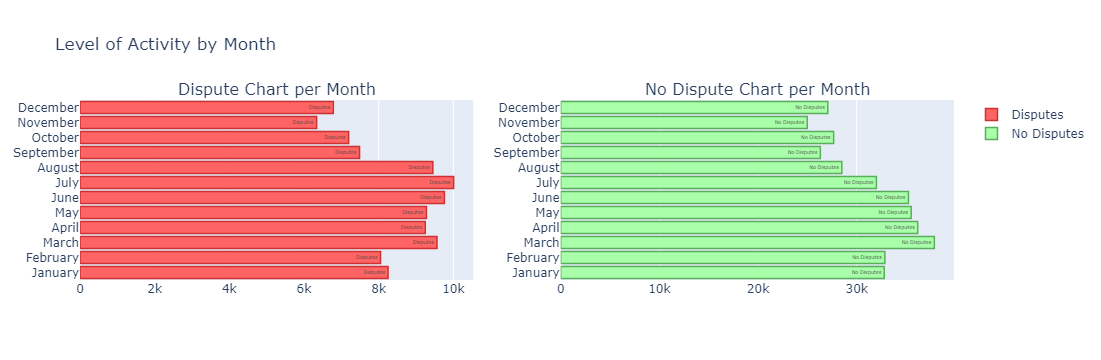

In [188]:
# Most active months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
disputes_by_month = [dis_january, dis_february, dis_march, dis_april, dis_may, dis_june, dis_july, dis_august, dis_september,
                    dis_october, dis_november, dis_december]

nodisputes_by_month = [nodis_january, nodis_february, nodis_march, nodis_april, nodis_may, nodis_june, nodis_july, 
                       nodis_august, nodis_september, nodis_october, nodis_november, nodis_december]


disputes_chart = go.Bar(
    y=months,
    x=disputes_by_month,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

nodisputes_chart = go.Bar(
    y=months,
    x=nodisputes_by_month,
    orientation='h',
    name='No Disputes',
    text='No Disputes',
    marker=dict(
        color='#A9FFA9',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)

fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Dispute Chart per Month',
                                          'No Dispute Chart per Month'))

fig.append_trace(disputes_chart, 1, 1)
fig.append_trace(nodisputes_chart, 1, 2)

fig['layout'].update(showlegend=True, title="Level of Activity by Month")
iplot(fig)

In [189]:
df.groupby(['Company'])['Complaint ID'].count().sort_values(ascending=False).head(5)

Company
Bank of America          46336
Wells Fargo & Company    35453
JPMorgan Chase & Co.     28852
Equifax                  28832
Experian                 26794
Name: Complaint ID, dtype: int64

In [190]:
dispute_presence = df.loc[df['Consumer disputed?'] == 'Yes']
cross_month = pd.crosstab(dispute_presence['State'], dispute_presence['Company']).apply(lambda x: x/x.sum() * 100)

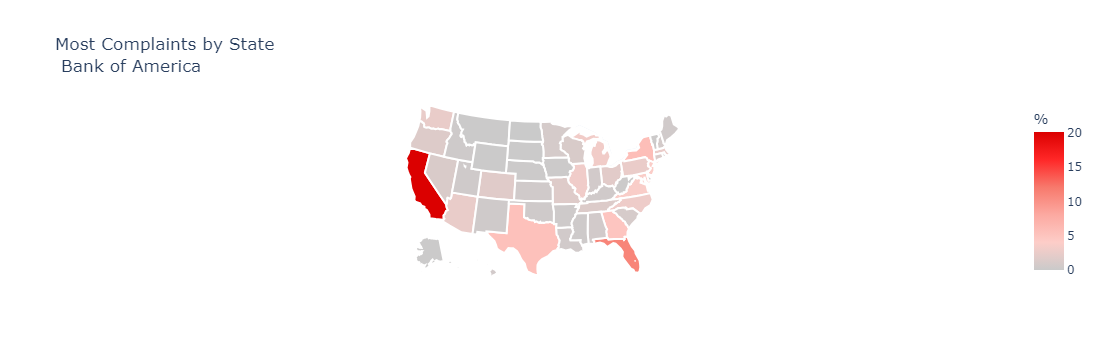

In [191]:
#  Share of Most disputes for Bank of America.
df_boa = pd.DataFrame(cross_month['Bank of America']).reset_index().sort_values(by="Bank of America", ascending=False).round(2)
df_boa = df_boa.rename(columns={'Bank of America': 'share of complaints'})

for col in df_boa.columns:
    df_boa[col] = df_boa[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_boa['text'] = "State Code: " + df_boa['State'] + '<br>'


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_boa['State'],
        z = df_boa['share of complaints'], 
        locationmode = 'USA-states',
        text = df_boa['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
    title = 'Most Complaints by State <br> Bank of America',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [192]:
df[df['Company'] == 'Bank of America']['Product'].value_counts()

Product
Mortgage                   29408
Bank account or service     8953
Credit card                 6122
Debt collection             1046
Consumer Loan                466
Money transfers              168
Student loan                  60
Other financial service       43
Credit reporting              33
Prepaid card                  30
Payday loan                    7
Name: count, dtype: int64

In [193]:
len(df[df['Timely response?'] == 'Yes'])/len(df['Timely response?'])

0.982977335861093

In [194]:
df[(df['Timely response?'] == 'Yes') & (df['Consumer disputed?'] == 'Yes')]['Company'].value_counts().head(10)

Company
Bank of America                           10421
Wells Fargo & Company                      8271
JPMorgan Chase & Co.                       6695
Equifax                                    6547
Citibank                                   4712
Ocwen                                      4241
TransUnion Intermediate Holdings, Inc.     3636
Experian                                   3602
Nationstar Mortgage                        2757
Capital One                                2565
Name: count, dtype: int64

In [195]:
len(df[(df['Timely response?'] == 'Yes') & (df['Consumer disputed?'] == 'Yes')])/len(df[df['Consumer disputed?'] == 'Yes'])

0.9838116552138892

In [196]:
df[(df['Timely response?'] == 'No') & (df['Consumer disputed?'] == 'Yes')]['Company'].value_counts().head(10)

Company
Bank of America                   228
Wells Fargo & Company              82
Ocwen                              77
Southwest Credit Systems, L.P.     30
CIT Bank National Association      26
Residential Credit Solutions       25
Nationstar Mortgage                18
U.S. Bancorp                       16
Citibank                           15
PNC Bank N.A.                      15
Name: count, dtype: int64

In [197]:
len(df[(df['Timely response?'] == 'No') & (df['Consumer disputed?'] == 'Yes')])/len(df[df['Consumer disputed?'] == 'Yes'])

0.016188344786110757

Text(0.5, 0, 'No of Complaints')

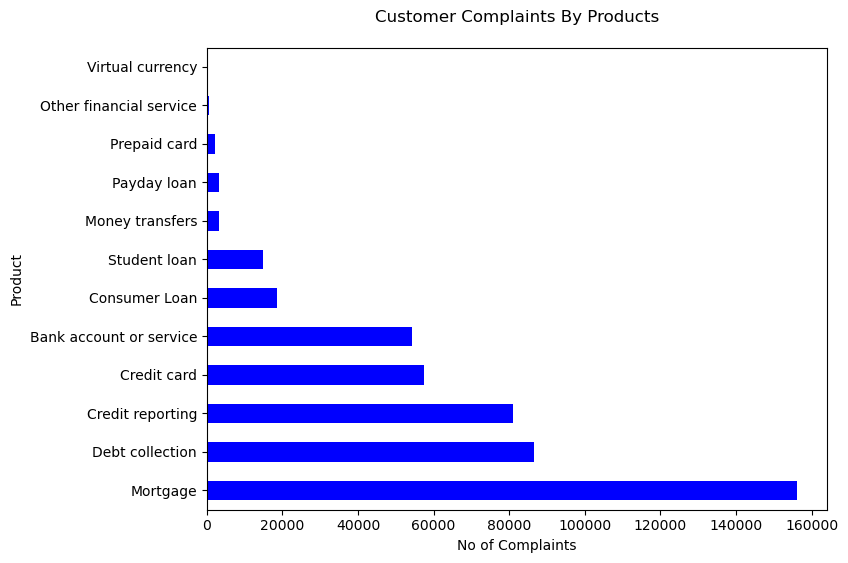

In [198]:
Complaints_by_products = df.groupby(['Product'])['Complaint ID'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(8,6))
Complaints_by_products.plot.barh(ylim=0,color='blue',title= 'Customer Complaints By Products\n')
plt.xlabel('No of Complaints')

In [199]:
df[df['Product'] == 'Mortgage']['Issue'].value_counts()

Issue
Loan modification,collection,foreclosure    80302
Loan servicing, payments, escrow account    51403
Application, originator, mortgage broker    11201
Settlement process and costs                 5834
Credit decision / Underwriting               3755
Other                                        3680
Name: count, dtype: int64

Text(0.5, 0, '')

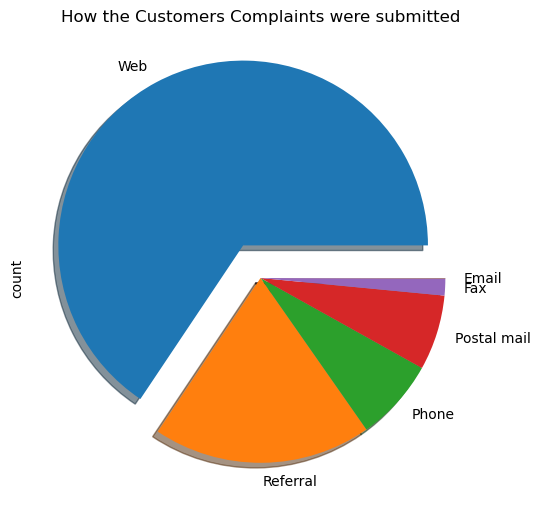

In [200]:
submitted_via_df = df['Submitted via'].value_counts()
fig = plt.figure(figsize=(8,6))
submitted_via_df.plot.pie(title= 'How the Customers Complaints were submitted\n',explode=[0.2,0,0,0,0,0],shadow=True)
plt.xlabel('')

Text(0.5, 0, 'No of Complaints')

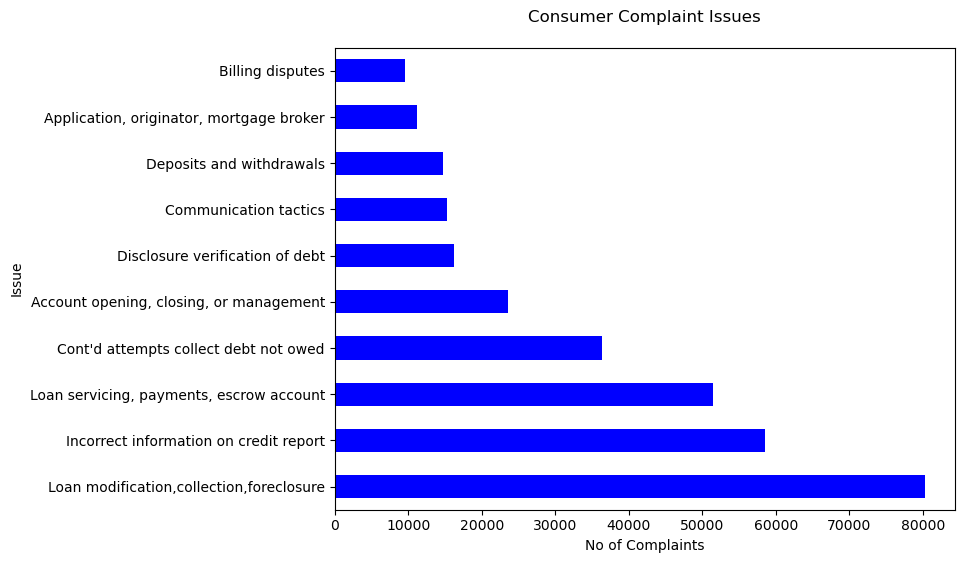

In [201]:
Issue_df = df['Issue'].value_counts().head(10)
fig = plt.figure(figsize=(8,6))
Issue_df.plot.barh(ylim=0, color='blue', title= 'Consumer Complaint Issues\n')
plt.xlabel('No of Complaints')

### text based modelling

In [203]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(75094, 2)

In [204]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

15.7

In [205]:
pd.DataFrame(df.Product.unique()).values

array([['Credit card'],
       ['Bank account or service'],
       ['Credit reporting'],
       ['Mortgage'],
       ['Debt collection'],
       ['Student loan'],
       ['Consumer Loan'],
       ['Money transfers'],
       ['Prepaid card'],
       ['Payday loan'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

In [206]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [207]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [208]:
pd.DataFrame(df2.Product.unique())

,0
0,Consumer Loan
1,Bank account or service
2,"Credit reporting, repair, or other"
3,Mortgage
4,Credit card or prepaid card
5,Debt collection
6,Money transfers
7,"Payday loan, title loan, or personal loan"
8,Student loan
9,Other financial service


In [209]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
34870,Consumer Loan,I am being harassed by a company called http X...,0
364610,Bank account or service,Paypal closed my account and is holding the fu...,1
214819,"Credit reporting, repair, or other",This company is continuing to request payment ...,2
155337,Mortgage,We submitted a short sale offer for review on ...,3
156954,Bank account or service,I have a banking account with Citibank that wa...,1


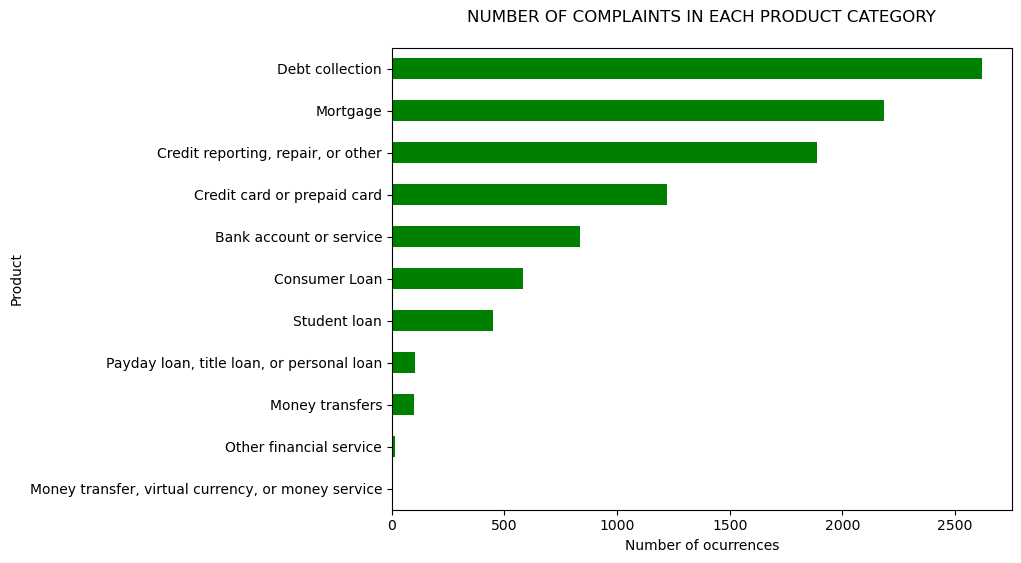

In [210]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color='Green', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

### text preprocessing

In [212]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 26975 features (TF-IDF score of unigrams and bigrams)


In [213]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: checking, bank, overdraft
  * Most Correlated Bigrams are: debit card, overdraft fees, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: ally, car, vehicle
  * Most Correlated Bigrams are: santander consumer, purchased vehicle, auto loan

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: amex, macy, card
  * Most Correlated Bigrams are: card company, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: transunion, experian, equifax
  * Most Correlated Bigrams are: report xxxx, trans union, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collection, collect debt, collection agency

==> Money transfer, virtual currency, or money service:
  * Most Correlated Unigrams are: bonuses, signup, referral
  * Most Correlated Bigrams are: 00 person, change terms

### Classification models

In [215]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [216]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    "LinearSVC": LinearSVC(),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(random_state=0),
}

CV = 5


In [217]:
# # List to hold entries for DataFrame
# entries = []

# # Iterate over each model
# for model_name, model in models.items():
#     print(f"Evaluating {model_name}...")
#     accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
#     # Append the results for each fold to the entries list
#     for fold_idx, accuracy in enumerate(accuracies):
#         entries.append((model_name, fold_idx, accuracy))

# # Create a DataFrame from the entries
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# # Print or analyze the results
# print(cv_df)


In [218]:
df.head(5).T

,0,1,2,3,4
Date received,2014-05-15 00:00:00,2014-09-18 00:00:00,2014-03-13 00:00:00,2015-07-17 00:00:00,2014-11-20 00:00:00
Product,Credit card,Bank account or service,Credit reporting,Credit card,Credit card
Sub-product,NaN,(CD) Certificate of deposit,NaN,NaN,NaN
Issue,Billing statement,"Making/receiving payments, sending money",Incorrect information on credit report,Billing statement,Transaction issue
Sub-issue,NaN,NaN,Account status,NaN,NaN
Consumer complaint narrative,NaN,NaN,NaN,"My credit card statement from US Bank, XXXX. X...",NaN
Company public response,NaN,NaN,NaN,Company chooses not to provide a public response,NaN
Company,Wells Fargo & Company,Santander Bank US,Equifax,U.S. Bancorp,Bank of America
State,MI,PA,CA,GA,MA
ZIP code,48342,18042,92427,305XX,02127


In [219]:
df1 = df.copy()

In [220]:
# complaint_ids = df1['Complaint ID'].copy()

In [221]:
df1.drop(['Date received','Date sent to company','Sub-product','Issue', 
          'Sub-issue','Consumer complaint narrative','ZIP code','Complaint ID'],axis=1,inplace=True)

In [222]:
df1.shape

(478421, 12)

In [223]:
df1.isnull().sum()

Product                              0
Company public response         388029
Company                              0
State                             3839
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
year_received                        0
month_received                       0
dtype: int64

In [224]:
df1['Company public response'].value_counts()

Company public response
Company chooses not to provide a public response                                                                           41915
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            25672
Company believes it acted appropriately as authorized by contract or law                                                   16040
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1460
Company believes the complaint is the result of a misunderstanding                                                          1418
Company disputes the facts presented in the complaint                                                                       1395
Company believes complaint is the result of an isolated error                                                               1062
Company can't verify or dispute the facts in the complaint               

In [225]:
df1['Consumer consent provided?'].value_counts()

Consumer consent provided?
Consent provided        75095
Consent not provided    56147
Other                    4242
Consent withdrawn           3
Name: count, dtype: int64

In [226]:
df1['Tags'].value_counts()

Tags
Older American                   39064
Servicemember                    22592
Older American, Servicemember     5550
Name: count, dtype: int64

In [227]:
df1.drop(['Tags'],axis=1,inplace=True)

In [228]:
df1.shape

(478421, 11)

In [229]:
df1['Company public response'].notnull().sum()

90392

In [230]:
df1['Consumer consent provided?'].fillna('Other',inplace=True)

In [231]:
df1['Consumer consent provided?'].isnull().sum()

0

In [232]:
df1.isnull().sum()

Product                              0
Company public response         388029
Company                              0
State                             3839
Consumer consent provided?           0
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
year_received                        0
month_received                       0
dtype: int64

In [233]:
df1['Company public response'].fillna('Company chooses not to provide a public response',inplace=True)

In [234]:
df1.isnull().sum()

Product                            0
Company public response            0
Company                            0
State                           3839
Consumer consent provided?         0
Submitted via                      0
Company response to consumer       0
Timely response?                   0
Consumer disputed?                 0
year_received                      0
month_received                     0
dtype: int64

In [235]:
df1.dropna(inplace=True)

In [236]:
df1.shape

(474582, 11)

In [237]:
df1.head(5).T

,0,1,2,3,4
Product,Credit card,Bank account or service,Credit reporting,Credit card,Credit card
Company public response,Company chooses not to provide a public response,Company chooses not to provide a public response,Company chooses not to provide a public response,Company chooses not to provide a public response,Company chooses not to provide a public response
Company,Wells Fargo & Company,Santander Bank US,Equifax,U.S. Bancorp,Bank of America
State,MI,PA,CA,GA,MA
Consumer consent provided?,Other,Other,Other,Consent provided,Other
Submitted via,Web,Referral,Referral,Web,Web
Company response to consumer,Closed with explanation,Closed,Closed with non-monetary relief,Closed with monetary relief,Closed with explanation
Timely response?,Yes,Yes,Yes,Yes,Yes
Consumer disputed?,No,No,No,No,No
year_received,2014,2014,2014,2015,2014


In [238]:
from sklearn.preprocessing import LabelEncoder

In [239]:
df1 = df1.apply(LabelEncoder().fit_transform)

In [240]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474582 entries, 0 to 478420
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Product                       474582 non-null  int32
 1   Company public response       474582 non-null  int32
 2   Company                       474582 non-null  int32
 3   State                         474582 non-null  int32
 4   Consumer consent provided?    474582 non-null  int32
 5   Submitted via                 474582 non-null  int32
 6   Company response to consumer  474582 non-null  int32
 7   Timely response?              474582 non-null  int32
 8   Consumer disputed?            474582 non-null  int32
 9   year_received                 474582 non-null  int64
 10  month_received                474582 non-null  int64
dtypes: int32(9), int64(2)
memory usage: 27.2 MB


In [241]:
df1.head()

,Product,Company public response,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,year_received,month_received
0,2,7,3186,29,3,5,1,1,0,3,4
1,0,7,2657,46,3,4,0,1,0,3,8
2,3,7,1075,8,3,4,3,1,0,3,2
3,2,7,3028,15,1,5,2,1,0,4,6
4,2,7,399,25,3,5,1,1,0,3,10


In [242]:
df2 = df1.sample(10000, random_state=1).copy()

In [243]:
df2['Consumer disputed?'].value_counts()

Consumer disputed?
0    7958
1    2042
Name: count, dtype: int64

In [244]:
X = df2.drop(['Consumer disputed?'],axis=1)
y = df2['Consumer disputed?']

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [247]:
log_reg = LogisticRegression(random_state=101,class_weight='balanced')

In [248]:
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=101)

In [249]:
predictions = log_reg.predict(X_test)

In [250]:
from sklearn.metrics import classification_report

0.4696
********************************************
Confusion matrix


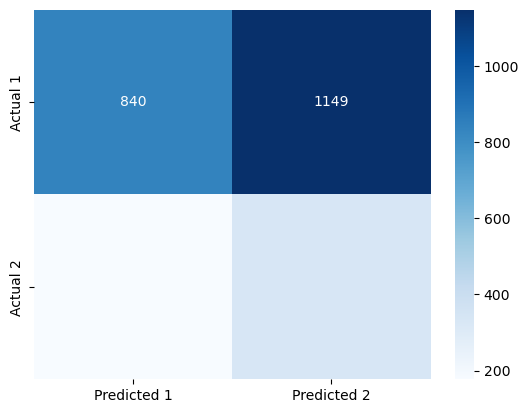

**********************************************
              precision    recall  f1-score   support

           0       0.83      0.42      0.56      1989
           1       0.23      0.65      0.34       511

    accuracy                           0.47      2500
   macro avg       0.53      0.54      0.45      2500
weighted avg       0.70      0.47      0.51      2500



In [251]:
import seaborn as sns
print(metrics.accuracy_score(y_test,predictions))
print('********************************************')
print('Confusion matrix')
lr_cfm=metrics.confusion_matrix(y_test, predictions)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('**********************************************')
print(metrics.classification_report(y_test,predictions))

In [252]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.5379715637572205


Text(0.5, 0, 'False Positive Rate')

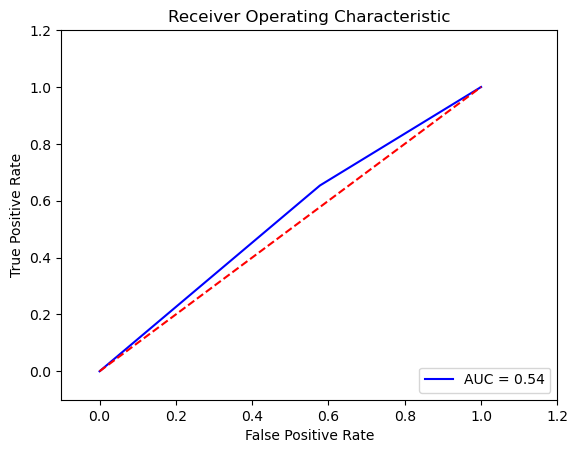

In [253]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [254]:
from sklearn.ensemble import RandomForestClassifier
random_grid = {'n_estimators': range(5,20,3),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [5,10,20,30],
              'min_samples_split':[2,5,10],
              'criterion':['entropy'],
              'min_samples_leaf':[1,2,4]}

rf=RandomForestClassifier(oob_score=True,class_weight='balanced')
rf_gs = GridSearchCV(rf, random_grid, cv = 5, n_jobs=-1, verbose=2)

rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


0.7644
*******************************************
Confusion matrix


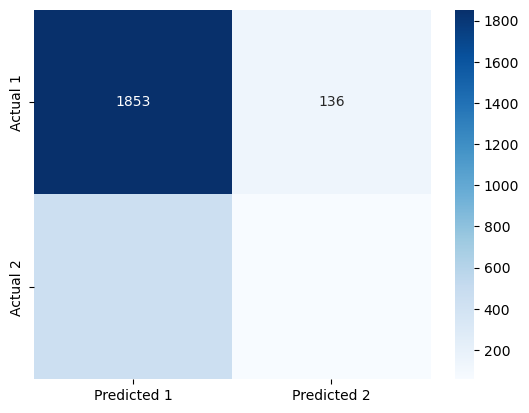

********************************************
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1989
           1       0.30      0.11      0.16       511

    accuracy                           0.76      2500
   macro avg       0.55      0.52      0.51      2500
weighted avg       0.70      0.76      0.72      2500



In [255]:
print(metrics.accuracy_score(y_test,y_pred))
print('*******************************************')
print('Confusion matrix')
rf_cfm=metrics.confusion_matrix(y_test, y_pred)

lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(rf_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('********************************************')
print(metrics.classification_report(y_test,y_pred))

In [256]:
# Actual Values of y_test
print (y_test.value_counts())
print ("Null Accuracy:",y_test.value_counts().head(1) / len(y_test))

Consumer disputed?
0    1989
1     511
Name: count, dtype: int64
Null Accuracy: Consumer disputed?
0    0.7956
Name: count, dtype: float64


In [257]:
predict_probabilities = rf_gs.predict_proba(X_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.5615739797850998


In [258]:
from xgboost.sklearn import XGBClassifier

In [259]:
xgb_model = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42) 

In [260]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=2, num_parallel_tree=None, ...)

In [261]:
xgboost_pred=xgb_model.predict(X_test)

In [262]:
from sklearn.preprocessing import LabelBinarizer

# Check if y_test and xgboost_pred are in the same format
print("y_test type:", type(y_test))
print("xgboost_pred type:", type(xgboost_pred))

# Convert if necessary
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)
if len(xgboost_pred.shape) > 1:
    xgboost_pred = np.argmax(xgboost_pred, axis=1)


y_test type: <class 'pandas.core.series.Series'>
xgboost_pred type: <class 'numpy.ndarray'>


0.7844
************
Confusion matrix


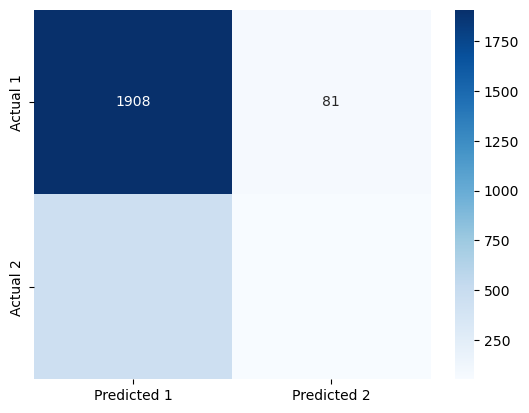

************
 Classification report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1989
           1       0.40      0.10      0.16       511

    accuracy                           0.78      2500
   macro avg       0.60      0.53      0.52      2500
weighted avg       0.72      0.78      0.73      2500



In [263]:
print(metrics.accuracy_score(y_test,xgboost_pred))
print('************')
print('Confusion matrix')
xgboost_cm=metrics.confusion_matrix(y_test, xgboost_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('************\n Classification report')
print(metrics.classification_report(y_test,xgboost_pred))

In [264]:
predict_probabilities = xgb_model.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.5667816828171381


In [265]:
xgb_gs_clf = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42)                         
                        
param_grid = {"max_depth": [10,15,20],
              "n_estimators": range(5,20,5) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}
#              "min_child_weight": [5,10], 
#              "colsample_bytree": [0.4,0.8], 
#              "subsample": [0.50,0.85]} 

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 15}

In [266]:
xgboost_y_pred=grid_search.predict(X_test)    

y_test shape: (2500,)
xgboost_y_pred shape: (2500, 2)
y_test after conversion: 167728    0
58733     0
261276    0
266556    0
49146     1
         ..
285193    1
133277    0
132664    0
407959    0
22180     0
Name: Consumer disputed?, Length: 2500, dtype: int32
xgboost_y_pred after conversion: [1 0 0 ... 0 0 0]
0.792
*************************************************
Confusion matrix


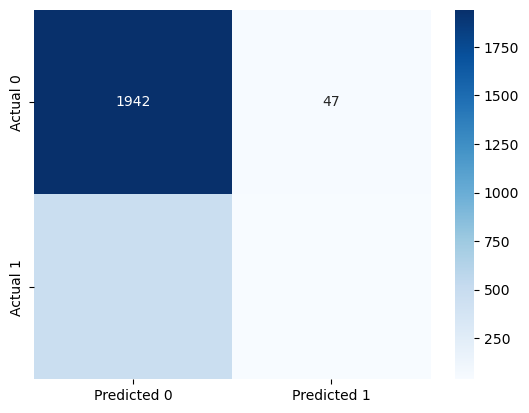

***************************************************
 Classification report
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1989
           1       0.45      0.07      0.13       511

    accuracy                           0.79      2500
   macro avg       0.63      0.53      0.50      2500
weighted avg       0.73      0.79      0.73      2500



In [267]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shapes and types of y_test and xgboost_y_pred
print("y_test shape:", y_test.shape)
print("xgboost_y_pred shape:", xgboost_y_pred.shape)

# Convert predictions to class labels if needed
if xgboost_y_pred.ndim > 1 and xgboost_y_pred.shape[1] > 1:
    xgboost_y_pred = np.argmax(xgboost_y_pred, axis=1)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Ensure they are 1D arrays
print("y_test after conversion:", y_test)
print("xgboost_y_pred after conversion:", xgboost_y_pred)

# Print accuracy score
print(metrics.accuracy_score(y_test, xgboost_y_pred))

# Print confusion matrix
print('*************************************************')
print('Confusion matrix')
xgboost_cfm = metrics.confusion_matrix(y_test, xgboost_y_pred)

# Define labels for the confusion matrix
lbl1 = ["Predicted 0", "Predicted 1"]  # Adjust based on your classes
lbl2 = ["Actual 0", "Actual 1"]

sns.heatmap(xgboost_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

# Print classification report
print('***************************************************\n Classification report')
print(metrics.classification_report(y_test, xgboost_y_pred))


In [268]:
# Print accuracy score
accuracy = metrics.accuracy_score(y_test, xgboost_y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7920


In [270]:
predict_probabilities = grid_search.predict_proba(X_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.5724380373856602


In [271]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: lightgbm in c:\users\hp\anaconda3\lib\site-packages (4.4.0)



In [272]:
import lightgbm as lgb

d_train= lgb.Dataset(X_train, label = y_train) 

In [273]:
params = {}
params['learning_rate'] = 0.001                                             # Learning rate
params['boosting_type'] = 'gbdt'                                           # gbdt = gradient boosted decision tree
params['objective'] = 'multiclass'                                         # Multi class classification
params['metric'] = 'multi_logloss'
params['num_classes'] = 5 
params['eval_metric']='auc', 'binary_logloss'
#params['sub_feature'] = 0.5
#params['min_data'] = 50
#params['max_depth'] = 10


clf = lgb.train(params, d_train)     

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 10
[LightGBM] [Info] Start training from score -0.228324
[LightGBM] [Info] Start training from score -1.588982
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776


In [274]:
#Prediction
y_pred=clf.predict(X_test)

In [275]:
clf.params

{'learning_rate': 0.001,
 'boosting_type': 'gbdt',
 'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_classes': 5,
 'eval_metric': ('auc', 'binary_logloss'),
 'num_iterations': 100}

In [276]:
predictions = []
predictions_proba = []
for x in y_pred:
    predictions.append(np.argmax(x))
    predictions_proba.append(max(x))

In [277]:
lgb_y_pred = np.array(predictions)

0.7956
*************************************************
Confusion matrix


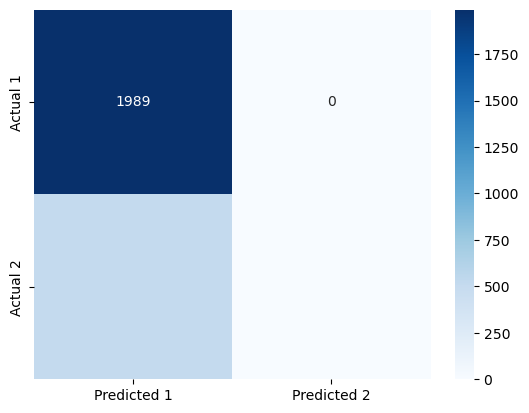

***************************************************
 Classification report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1989
           1       0.00      0.00      0.00       511

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500



In [278]:
print(metrics.accuracy_score(y_test,lgb_y_pred))
print('*************************************************')
print('Confusion matrix')
lgb_cfm=metrics.confusion_matrix(y_test, lgb_y_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lgb_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('***************************************************\n Classification report')
print(metrics.classification_report(y_test,lgb_y_pred))

In [347]:
final_metric = roc_auc_score(y_test, predictions_proba)
print (final_metric)

0.41992062016236065


In [542]:
test_df=pd.read_csv('Consumer_Complaints_test_share.csv')

In [543]:
test_df.shape

(119606, 17)

In [546]:
# Save the 'Complaint ID' column from the original test data
complaint_ids = test_df['Complaint ID'].copy()  # Ensure you're using the original test data with 'Complaint ID'



In [548]:
test_df.drop(['Date received','Date sent to company','Sub-product','Issue', 
          'Sub-issue','Consumer complaint narrative','ZIP code','Complaint ID'],axis=1,inplace=True)

In [552]:
test_df.isnull().sum()

Product                              0
Company public response          96830
Company                              0
State                              925
Tags                            102735
Consumer consent provided?       85742
Submitted via                        1
Company response to consumer         0
Timely response?                     0
dtype: int64

In [553]:
test_df.drop(['Tags'],axis=1,inplace=True)

In [554]:
test_df['Consumer consent provided?'].fillna('Other',inplace=True)

In [555]:
test_df['Company public response'].fillna('Company chooses not to provide a public response',inplace=True)

In [556]:
test_df.isnull().sum()

Product                           0
Company public response           0
Company                           0
State                           925
Consumer consent provided?        0
Submitted via                     1
Company response to consumer      0
Timely response?                  0
dtype: int64

In [557]:
test_df.dropna(inplace=True)

In [558]:
test_df.shape

(118680, 8)

In [510]:
test_df1 = test_df.apply(LabelEncoder().fit_transform)

In [512]:
test_df1.head()

,Product,Company public response,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Complaint ID
0,0,7,271,8,3,5,1,1,37452
1,4,7,1397,13,0,5,1,1,107502
2,6,7,2181,8,3,5,5,1,2383
3,3,7,2046,13,3,3,3,1,99262
4,6,7,271,13,3,5,1,1,28138


In [514]:
import pandas as pd

# Example: Creating a DataFrame with columns expected by the model
expected_columns = ['Product', 'Company public response', 'Company', 'State', 'Consumer consent provided?', 'Submitted via', 'Company response to consumer', 'Timely response?', 'year_received', 'month_received']

# Adding missing columns with default values
for col in expected_columns:
    if col not in test_df1.columns:
        test_df1[col] = 0  # Default value

# Reorder columns to match the model's feature names
test_df1 = test_df1[expected_columns]

#  make predictions
test_predictions = xgb_model.predict(test_df1)


In [516]:
test_predictions.shape

(118680, 2)

In [518]:

test_predictions = test_predictions[:, 0]  # Select first column

test_predictions_df = pd.DataFrame(test_predictions, columns=['Consumer Disputed Predictions'])



In [520]:
test_predictions_df = pd.DataFrame(test_predictions,columns=['Consumer Disputed Predictions'])
test_predictions_df.to_csv('Cust_Dispute_predictions.csv',"w",index=False)

In [534]:

prediction_labels = np.where(test_predictions == 1, "Yes", "No")


In [536]:
submission_df = pd.DataFrame({
    'Complaint ID': test_df['Complaint ID'],
    'Consumer Disputed Predictions': prediction_labels
})

In [568]:
submission_df.head(4)

,Complaint ID,Consumer Disputed Predictions
0,675956,Yes
1,1858795,Yes
2,32637,No
3,1731374,Yes


In [538]:
submission_df.to_csv('Cust_Dispute_predictions.csv', index=False)